In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%mastplotlib inline

UsageError: Line magic function `%mastplotlib` not found.


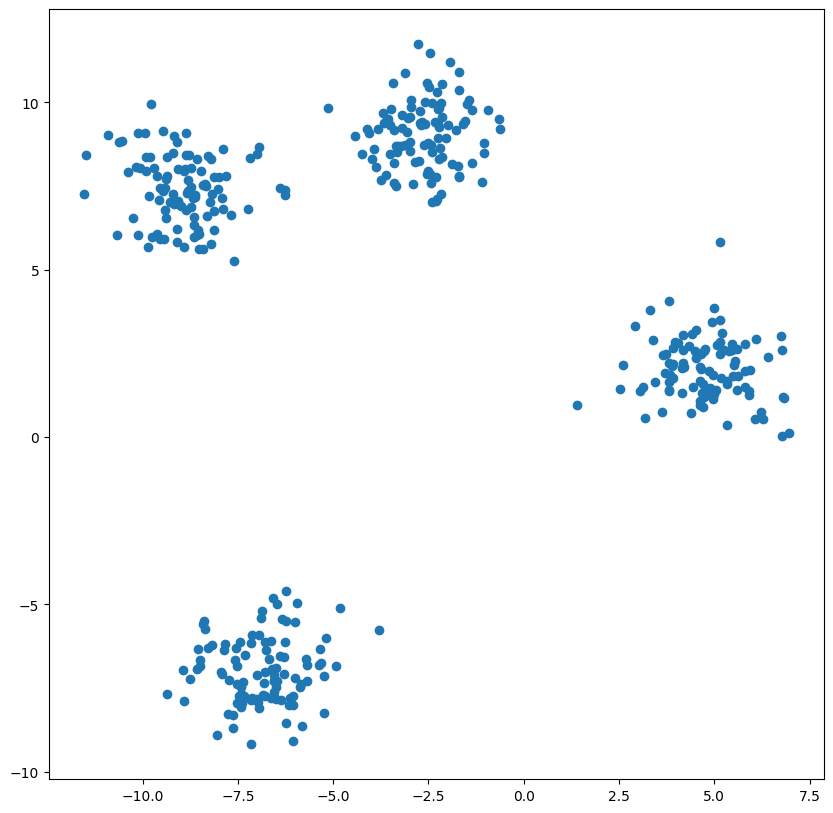

In [7]:
# 2. Generate the sample dataset
x, y_true = make_blobs(n_samples=400, n_features=2, centers=4, random_state=42)
plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [4]:
#3. from sklearn
from sklearn.cluster import KMeans

In [6]:
# 4. Define the k-means cluster object
model = KMeans(n_clusters=4)
model.fit(x)


KMeans(n_clusters=4)

In [29]:
# Step size for the mesh grid
step_size = 0.01

# Plot the decisiion boundaries
x1_min, x1_max = min(x[:, 0]) - 1, max(x[:, 0]) + 1
x2_min, x2_max = min(x[:, 1]) - 1, max(x[:, 1]) + 1
x1_values, x2_values = np.meshgrid(np.arange(x1_min, x1_max, step_size), np.arange(x2_min, x2_max, step_size))

# Place it in a numpy array
x_new = np.c_[x1_values.ravel(), x2_values.ravel()]

In [30]:
#. 5. Perform prediction
predictions = model.predict(x_new)
predictions = np.reshape(predictions, x1_values.shape)

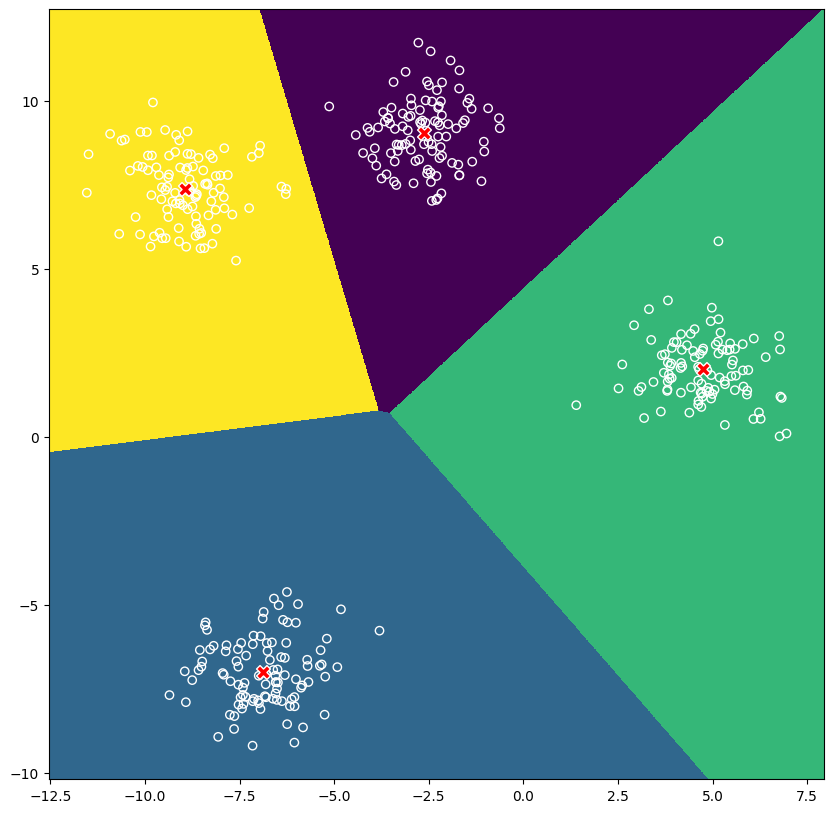

In [34]:
plt.figure(figsize=(10, 10))
plt.imshow(predictions, interpolation='nearest', extent=(x1_values.min(), x1_values.max(), x2_values.min(), x2_values.max()), aspect='auto', origin='lower')
plt.scatter(x[:, 0], x[:, 1], marker='o', facecolors='none', edgecolors='w')
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', facecolors='red', edgecolors='w', s=100)

In [35]:
print(model.inertia_)

766.5183043840315


### Steps to identify the besk k
1. Create a list of k to TextDisplayObject2. Loop through the list with K-means clustering training
2. Loop through the fist with K-means clustring training
3. Record the inertia value for each loop, at the end, you will get a list of inertia values,
4. Plot a graph of inertia vavlue against k
5. Use the elboy method to identify the best k


In [37]:
k_values = np.arange(2, 11)
inertias = []
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)
    print(k_values)
    print(inertias)

[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 766.5183043840315]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 766.5183043840315, 699.6957223109581]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 766.5183043840315, 699.6957223109581, 624.4646971518664]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 766.5183043840315, 699.6957223109581, 624.4646971518664, 594.0418018538909]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 766.5183043840315, 699.6957223109581, 624.4646971518664, 594.0418018538909, 539.6708937338188]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 766.5183043840315, 699.6957223109581, 624.4646971518664, 594.0418018538909, 539.6708937338188, 442.091617828632]
[ 2  3  4  5  6  7  8  9 10]
[12840.703174103475, 2886.532721857724, 

Text(0, 0.5, 'WSS')

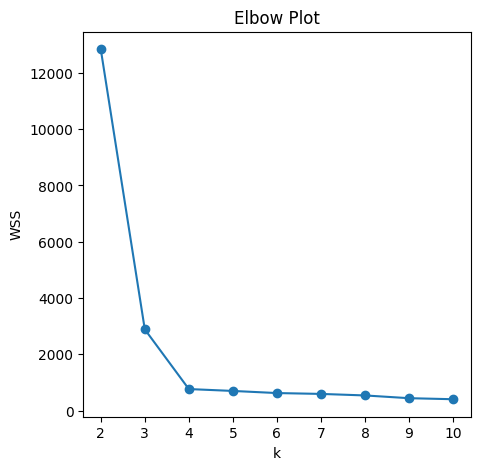

In [42]:
# Create a line grpah for us to determine 
plt.figure(figsize=(5, 5))
plt.plot(k_values, inertias, 'o-')
plt.title("Elbow Plot")
plt.xlabel("k")
plt.ylabel("WSS")

##3 Conclusion
Bassed on the elbow point, the elbow pint is k=4, so 4 is the optimal number of clusters.